In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patheffects as pe 
from matplotlib.legend_handler import HandlerLine2D
from matplotlib.patches import FancyArrowPatch

from mplsoccer.pitch import VerticalPitch
from adjustText import adjust_text

from statsbombpy import sb

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.sans-serif'] = 'Palatino Linotype'

/Users/leesol/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


The match I'd like to use is the Champions League Final 2017: Juventus vs. Real Madrid

In [2]:
sb.competitions().head(5)
sb.matches(competition_id=16, season_id=2)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,18244,2017-06-03,20:45:00.000,Europe - Champions League,2016/2017,Juventus,Real Madrid,1,4,available,...,2021-06-13T16:17:31.694,7,Final,Principality Stadium,Felix Brych,Massimiliano Allegri,Zinédine Zidane,1.0.3,None,None


These are all events that are recorded in the statsbomb database.

In [3]:
MATCH_ID = 18244
events = sb.events(MATCH_ID)
events.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_recovery_failure', 'block_deflection',
       'carry_end_location', 'clearance_aerial_won', 'counterpress',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_offensive', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'pass_aerial_won', 'pass_angle',
       'pass_assisted_shot_id', 'pass_backheel', 'pass_body_part',
       'pass_cross', 'pass_cut_back', 'pass_deflected', 'pass_end_location',
       'pass_goal_assist', 'pass_height', 'pass_length', 'pass_outcome',
       'pass_recipient', 'pass_recipient_id', 'pass_shot_a

For the pass map, I want to only pull up the 'location,' 'pass_end_location,' 'pass_length,' 'team,' 'player,' and 'pass_recipient'.
I put those in all_events_df and dropna() to eliminate empty rows.

Since I want to try making a pass map for Real Madrid only (for now), I select from all_events_df where the 'team' column is == 'Real Madrid'.
This information is put in rma_df.

I followed this video for reference: https://www.youtube.com/watch?v=o1ZHIocdTEk

In [4]:
all_events_df = events[['location', 'pass_end_location', 'pass_length', 'team', 'player', 'pass_recipient']].dropna()
rma_df = all_events_df.loc[all_events_df['team']=='Real Madrid'].reset_index(drop=True)

rma_df

juv_df = all_events_df.loc[all_events_df['team']=='Juventus'].reset_index(drop=True)


I specifically look at the pass starting x and y values from 'location' column, and pass ending x and y values from 'pass_end_location' column.

In [5]:
import pandas as pd

start_df = pd.DataFrame(rma_df['location'].to_list(), columns=['start_x','start_y']).reset_index(drop=True)
rma_all = rma_df.join(start_df)

end_df = pd.DataFrame(rma_df['pass_end_location'].to_list(), columns=['end_x','end_y']).reset_index(drop=True)
rma_all = rma_all.join(end_df)
rma_all

,location,pass_end_location,pass_length,team,player,pass_recipient,start_x,start_y,end_x,end_y
0,"[29.0, 73.0]","[32.0, 74.0]",3.162278,Real Madrid,Daniel Carvajal Ramos,Luka Modrić,29.0,73.0,32.0,74.0
1,"[15.0, 54.0]","[21.0, 62.0]",10.000000,Real Madrid,Toni Kroos,Luka Modrić,15.0,54.0,21.0,62.0
2,"[27.0, 56.0]","[41.0, 63.0]",15.652476,Real Madrid,Raphaël Varane,Luka Modrić,27.0,56.0,41.0,63.0
3,"[48.0, 70.0]","[57.0, 65.0]",10.295630,Real Madrid,Raphaël Varane,Toni Kroos,48.0,70.0,57.0,65.0
4,"[57.0, 65.0]","[61.0, 75.0]",10.770329,Real Madrid,Toni Kroos,Luka Modrić,57.0,65.0,61.0,75.0
...,...,...,...,...,...,...,...,...,...,...
514,"[78.0, 78.0]","[66.0, 76.0]",12.165525,Real Madrid,Marco Asensio Willemsen,Daniel Carvajal Ramos,78.0,78.0,66.0,76.0
515,"[68.0, 76.0]","[65.0, 5.0]",71.063354,Real Madrid,Daniel Carvajal Ramos,Gareth Frank Bale,68.0,76.0,65.0,5.0
516,"[69.0, 15.0]","[57.0, 26.0]",16.278820,Real Madrid,Gareth Frank Bale,Sergio Ramos García,69.0,15.0,57.0,26.0
517,"[55.0, 27.0]","[64.0, 36.0]",12.727922,Real Madrid,Sergio Ramos García,Carlos Henrique Casimiro,55.0,27.0,64.0,36.0


Passmap Logic

From here, I followed this tutorial: https://sharmaabhishekk.github.io/projects/passmap

1. Groupby 1 is used to get the average positions for players’ - we can aggregate on the player names and calulate a mean/median value for x and y

In [6]:
player_location_df = rma_all.\
                         groupby(['player']).\
                         agg(x=('start_x', 'mean'), 
                             y=('start_y', 'mean'),
                             total=('start_x', 'size')
                             ).\
                         reset_index()
player_location_df

,player,x,y,total
0,Carlos Henrique Casimiro,50.867925,41.566038,53
1,Cristiano Ronaldo dos Santos Aveiro,75.450000,37.350000,20
2,Daniel Carvajal Ramos,59.859649,71.543860,57
3,Francisco Román Alarcón Suárez,71.480000,29.760000,50
4,Gareth Frank Bale,64.000000,10.000000,4
5,Karim Benzema,79.368421,22.157895,19
6,Keylor Navas Gamboa,13.058824,40.647059,17
7,Luka Modrić,63.603774,51.735849,53
8,Marcelo Vieira da Silva Júnior,61.757576,9.136364,66
9,Marco Asensio Willemsen,68.750000,65.500000,4


Groupby 2 is used to calculate the number of successful passes between all pairs of players - the starting 11 probably makes the most sense in most cases (except for red cards and early substitutions)

In [7]:
players_passes_df = rma_all.\
        groupby(['player', 'pass_recipient']).\
        agg(passes=('start_x', 'size')).\
        reset_index()

players_passes_df

,player,pass_recipient,passes
0,Carlos Henrique Casimiro,Daniel Carvajal Ramos,8
1,Carlos Henrique Casimiro,Francisco Román Alarcón Suárez,10
2,Carlos Henrique Casimiro,Karim Benzema,1
3,Carlos Henrique Casimiro,Keylor Navas Gamboa,2
4,Carlos Henrique Casimiro,Luka Modrić,7
...,...,...,...
105,Toni Kroos,Keylor Navas Gamboa,1
106,Toni Kroos,Luka Modrić,10
107,Toni Kroos,Marcelo Vieira da Silva Júnior,11
108,Toni Kroos,Raphaël Varane,2


Once we have those two we can loop over the result of groupby 2 and use each player’s corresponding average position from groupby 1 to plot an arrow (passes).

I kept the comments because I am still not familiar with lambda & dataframe techniques. I want to remember them. I am sorry about the messy code block.

In [8]:
# extract starting xi in a dataframe

match_lineup = sb.lineups(MATCH_ID)
rma_roster = match_lineup['Real Madrid']

# lambda parameters: expression
# column.apply(lambda x: x) functions are the way to go for DataFrames.
# it operates on each element of a Series (column).

# below fails on the other hand-- for loops iterate over a DataFrame column. it gives you the elemnts of the column directly. 
# in this case, you are iterating over the entire column, and each i is a list (assuming 'positions' contains lists), not a single element.
# for i in rma_lineup['positions']:
#     print(i['start_reason'])

# pd.set_option('display.max_colwidth', 3)
pd.reset_option('all')

# starting_xi = pd.DataFrame({'player_name': rma_lineup['player_name'], 'start_reason': rma_lineup['positions'].apply(lambda x: x[0]['start_reason'] if x else None)})
# starting_xi['start_reason'] = rma_lineup['positions'].apply(lambda x: x[0]['start_reason'] if x else None)
# starting_xi['player_name'] = rma_lineup['player_name']

starting_xi = rma_roster.copy()
starting_xi['start_reason'] = rma_roster['positions'].apply(lambda x: x[0]['start_reason'] if x else None)
# starting_xi['player_name'] = starting_xi['player_nickname'].combine_first(starting_xi['player_name'])
# starting_xi.iloc[:, [7]]
starting_xi = starting_xi.loc[starting_xi['start_reason'] == 'Starting XI'] # case sensitive
starting_xi

,player_id,player_name,player_nickname,jersey_number,country,cards,positions,start_reason
2,4926,Francisco Román Alarcón Suárez,Isco,22,Spain,[],"[{'position_id': 19, 'position': 'Center Attac...",Starting XI
3,5201,Sergio Ramos García,Sergio Ramos,4,Spain,"[{'time': '30:40', 'card_type': 'Yellow Card',...","[{'position_id': 5, 'position': 'Left Center B...",Starting XI
5,5207,Cristiano Ronaldo dos Santos Aveiro,Cristiano Ronaldo,7,Portugal,[],"[{'position_id': 24, 'position': 'Left Center ...",Starting XI
7,5463,Luka Modrić,None,19,Croatia,[],"[{'position_id': 15, 'position': 'Left Center ...",Starting XI
8,5485,Raphaël Varane,None,5,France,[],"[{'position_id': 3, 'position': 'Right Center ...",Starting XI
9,5539,Carlos Henrique Casimiro,Casemiro,14,Brazil,[],"[{'position_id': 10, 'position': 'Center Defen...",Starting XI
10,5552,Marcelo Vieira da Silva Júnior,Marcelo,12,Brazil,[],"[{'position_id': 6, 'position': 'Left Back', '...",Starting XI
11,5574,Toni Kroos,None,8,Germany,"[{'time': '52:07', 'card_type': 'Yellow Card',...","[{'position_id': 13, 'position': 'Right Center...",Starting XI
12,5597,Keylor Navas Gamboa,Keylor Navas,1,Costa Rica,[],"[{'position_id': 1, 'position': 'Goalkeeper', ...",Starting XI
14,5721,Daniel Carvajal Ramos,Daniel Carvajal,2,Spain,"[{'time': '41:08', 'card_type': 'Yellow Card',...","[{'position_id': 2, 'position': 'Right Back', ...",Starting XI


In [9]:
class AnnotationHandler(HandlerLine2D):
    """
    Copied this from https://stackoverflow.com/a/49262926 

    Useful to add a annotation entry to legend since it is not
    automatically added
    """
    def __init__(self,ms,*args,**kwargs):
        self.ms = ms
        HandlerLine2D.__init__(self,*args,**kwargs)
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize,
                       trans):
        xdata, _ = self.get_xdata(legend, xdescent, ydescent,
                                             width, height, fontsize)
        ydata = ((height - ydescent) / 2.) * np.ones(np.array(xdata).shape, float)
        legline = FancyArrowPatch(posA=(xdata[0],ydata[0]),
                                  posB=(xdata[-1],ydata[-1]),
                                  mutation_scale=self.ms,
                                  **orig_handle.arrowprops)
        legline.set_transform(trans)
        return legline,

def add_arrow(x1, 
              y1, 
              x2, 
              y2, 
              ax,
              **kwargs
              ):
    """
    Helper function to add an arrow b/w two points
    defined by (x1,y1) and (x2, y2)

    A line is drawn from point A to point B. An arrow is then drawn from point A along halfway to point B. This is an easy way to get an arrow with a head in the middle
    """
    ax.plot([x1, x2], 
            [y1, y2], 
            **kwargs)
        
    annotation = ax.annotate("", 
                xytext=(x1, y1), 
                xy=( x1+((x2-x1)/2), 
                         y1+((y2-y1)/2)
                        ),
                arrowprops=dict(arrowstyle="->", **kwargs),
                zorder=10,
                size=30,
                label="Darker color indicates higher number of passes in that direction"
                )
    
    return annotation

I had to edit this quite a bit to match the logic I had added previously. The most challenging was creating the list of starters and mapping them with the player nicknames (ex. Cristiano Ronaldo dos Santos Aveiro -> Cristiano Ronaldo). Not all players have a nickname (ex. Luka Modrić has 'None' as player_nickname.)

Ultimately, the solution was using pd.merge(). You can see what I did to create merged_df.

    - merged_df = pd.merge(player_location_df, nicknames_df, left_on='player', right_on='player_name', how='left')
    - merged_df['player'] = merged_df['player_nickname'].combine_first(merged_df['player'])

    merged_df now has the player name & player nicknames mapped, and combined_first() allows for only merging players with a non-empty 'player_nickname'.

In [10]:
rma_all

def draw_passmap(ax, team_pass_df, starter_names_list, team_name, color):
#starter_ids = [starting_xi['player_id'] for starter in starting_xi]
    # rma_all = team_pass_df in tutorial
    team_pass_df = rma_all.query(f"player in {starter_names_list}")
    # It checks if the 'player' column in the DataFrame is present in the list of 'starter_names_list'. The curly braces {} are used to embed the values of the 'starter_names_list' list into the string.

    player_location_df = team_pass_df.\
                            groupby(['player']).\
                            agg(x=('start_x', 'mean'), 
                                y=('start_y', 'mean'),
                                total=('start_x', 'size')
                                ).\
                            reset_index()

    #display(player_location_df)

    players_passes_df = team_pass_df.\
            groupby(['player', 'pass_recipient']).\
            agg(passes=('start_x', 'size')).\
            reset_index()


    # some pandas merging to get all useful data in a single # df
    players_passes_df = players_passes_df.merge(player_location_df[['player', 'x', 'y']], 
                                        left_on='player', right_on='player').\
                                            rename(columns={'x': 'passer_x', 
                                                            'y': 'passer_y'}
                                                    )

    players_passes_df = players_passes_df.merge(player_location_df[['player', 'x', 'y']], 
                                            left_on='pass_recipient', right_on='player').\
                                                rename(columns={'x': 'recipient_x', 
                                                                'y': 'recipient_y', 
                                                                'player_x': 'player'}
                                                    )


    players_passes_df.drop('player_y', axis=1, inplace=True)
    #players_passes_df.sort_values("passes", ascending=True, inplace=True)

    ## 
    cmap_name = "cmap"
    # cmap = plt.cm.get_cmap(name=cmap_name) deprecated
    cmap = plt.cm.get_cmap()
    highest_passes = players_passes_df['passes'].max()
    players_passes_df['passes_scaled'] = players_passes_df['passes']/highest_passes

    annotations = []
    LABEL = True

    MIN_PASS_COUNT = 2
    ARROW_SHIFT = 2

    for row in players_passes_df.itertuples():
        if row.passes > MIN_PASS_COUNT:

            if abs(row.recipient_y - row.passer_y) > abs(row.recipient_x - row.passer_x):
                if row.player > row.pass_recipient:
                    x_shift, y_shift = 0, ARROW_SHIFT
                else: 
                    x_shift, y_shift = 0, -ARROW_SHIFT
            else:
                if row.player > row.pass_recipient:
                    x_shift, y_shift = ARROW_SHIFT, 0
                else: 
                    x_shift, y_shift = -ARROW_SHIFT, 0

            arrow = add_arrow(x1=row.recipient_y+y_shift, 
                        y1=row.recipient_x+x_shift,
                        x2=row.passer_y+y_shift, 
                        y2=row.passer_x+x_shift,
                        ax=ax, 
                        #color=cmap(row.passes_scaled), 
                        color='navy',
                        alpha=row.passes_scaled,
                        lw=row.passes_scaled*2)
            
            annotations.append(arrow)

    texts = []

    #player_location_df.sort_values("total", ascending=True, inplace=True)
    #display(player_location_df)

    names_list = player_location_df['player'].tolist()

    nicknames_df = pd.DataFrame({'player_name': starting_xi['player_name'], 'player_nickname': starting_xi['player_nickname']})

    merged_df = pd.merge(player_location_df, nicknames_df, left_on='player', right_on='player_name', how='left')
    merged_df['player'] = merged_df['player_nickname'].combine_first(merged_df['player'])

    #for name in names_list:
        #nicknames_df['player_nickname'] == 'Isco'
        #if (nicknames_df.loc[nicknames_df['player_name'] == name]):
            #print(name)

        #nicknames_df['player_name'] = nicknames_df['player_nickname'].where(nicknames_df['player_nickname'].notna(), nicknames_df['player_name'])

    names_list_with_nicknames = merged_df['player'].tolist()

    # display(names_list)
    display(merged_df)

    #print(names_list_with_nicknames)
    
    for row in player_location_df.itertuples():
        ax.scatter(row.y, 
                row.x, 
                s=(row.total/player_location_df.total.max())*700,
                fc='white',
                ec=color,
                lw=5,
                zorder=100, 
                label="Size indicates total passes made by player" if LABEL else "" 
                )
        text = ax.text(row.y, 
                    row.x-4, 
                    #s=popular_names_dict[row.player], 
                    #starter_names_list[row.Index],
                    names_list_with_nicknames[row.Index],
                    ha='center', 
                    va='center', 
                    zorder=200)
                
        text.set_path_effects([pe.PathPatchEffect(offset=(2, -2), hatch='xxxx', facecolor='gray'),
                            ])
        texts.append(text)

        LABEL = False
    # use this if you have names getting plotted over each other
    # adjust_text(texts)

 

I removed the loop from the original function written in https://sharmaabhishekk.github.io/projects/passmap , since I am only creating a map for Real Madrid. I would need to put this in a for loop if I were to create a pass map for both teams.

/var/folders/m6/p72pwk8n3vl3j9zwckvp0xgm0000gn/T/ipykernel_7080/3844478146.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap()


,player,x,y,total,player_name,player_nickname
0,Casemiro,50.867925,41.566038,53,Carlos Henrique Casimiro,Casemiro
1,Cristiano Ronaldo,75.450000,37.350000,20,Cristiano Ronaldo dos Santos Aveiro,Cristiano Ronaldo
2,Daniel Carvajal,59.859649,71.543860,57,Daniel Carvajal Ramos,Daniel Carvajal
3,Isco,71.480000,29.760000,50,Francisco Román Alarcón Suárez,Isco
4,Karim Benzema,79.368421,22.157895,19,Karim Benzema,None
5,Keylor Navas,13.058824,40.647059,17,Keylor Navas Gamboa,Keylor Navas
6,Luka Modrić,63.603774,51.735849,53,Luka Modrić,None
7,Marcelo,61.757576,9.136364,66,Marcelo Vieira da Silva Júnior,Marcelo
8,Raphaël Varane,44.586957,56.717391,46,Raphaël Varane,None
9,Sergio Ramos,42.016949,26.118644,59,Sergio Ramos García,Sergio Ramos


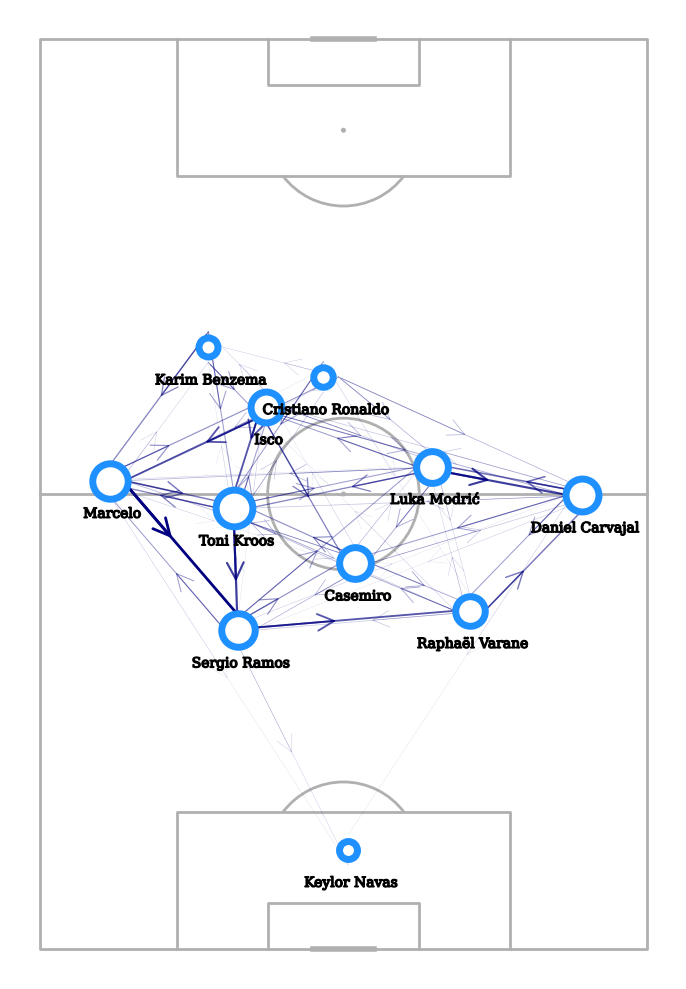

In [11]:
# get only open-play successful passes
pass_df = events.query("(type == 'Pass') & \
                    (pass_type not in ['Free Kick', 'Corner', 'Throw-in', 'Kick Off']) & \
                    (pass_outcome not in ['Unknown','Out','Pass Offside','Injury Clearance', 'Incomplete'])"
                   ).reset_index(drop=True)

pass_df[['start_x','start_y']] = pd.DataFrame(pass_df["location"].values.tolist(), 
                                                        index = pass_df.index)
pass_df[['end_x','end_y']] = pd.DataFrame(pass_df["pass_end_location"].values.tolist(), 
                                                         index = pass_df.index)


idx_sides = ((0, 'dodgerblue', 'Blues'), 
             #(1, 'red', 'Reds')
             )

fig, axes = VerticalPitch().draw(nrows=1, 
                       ncols=1, 
                       figsize=(16,10)
                       )
fig.set_facecolor("white")

# I want to just print 1 team, so no loop
starter_names_list = starting_xi['player_name'].tolist()
team_name = 'Real Madrid'
team_pass_df = pass_df.query(f"team == '{team_name}'")

if 'Substitution' in events.type.unique() or 'Red Card' in events.type.unique():
    ending_minute = events.query(f"team == '{team_name}' and type==('Substitution', 'Red Card')").minute.values[0]
else: 
    ending_minute = team_pass_df.minute.max()

team_pass_df = team_pass_df.query(f"minute<={ending_minute}")
draw_passmap(axes, 
                team_pass_df,
                #popular_names_dict=popular_names_dict,
                starter_names_list = starter_names_list, 
                team_name=team_name,
                color='dodgerblue',
                #cmap_name=cmap
                )
    


Above is the final output!
Each player is represented by a circle. A larger circle size indicates a higher number of passes by that player. A darker arrow indicates a more frequent pass route.